In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

plt.rcParams['figure.figsize'] = [32,12]
plt.rcParams.update({'font.size': 18})

def randomSVD(X, r, q, p):
    # Step 1
    P = np.random.randn(X.shape[1], r+p)
    Z = X @ P
    for k in range(q):
        z = X @ (X.T @ Z)
    
    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2
    Y = Q.T @ X
    Uy, S, Vt = np.linalg.svd(Y, full_matrices=0)
    U = Q @ Uy

    return U, S, Vt

(-0.5, 2259.5, 3206.5, -0.5)

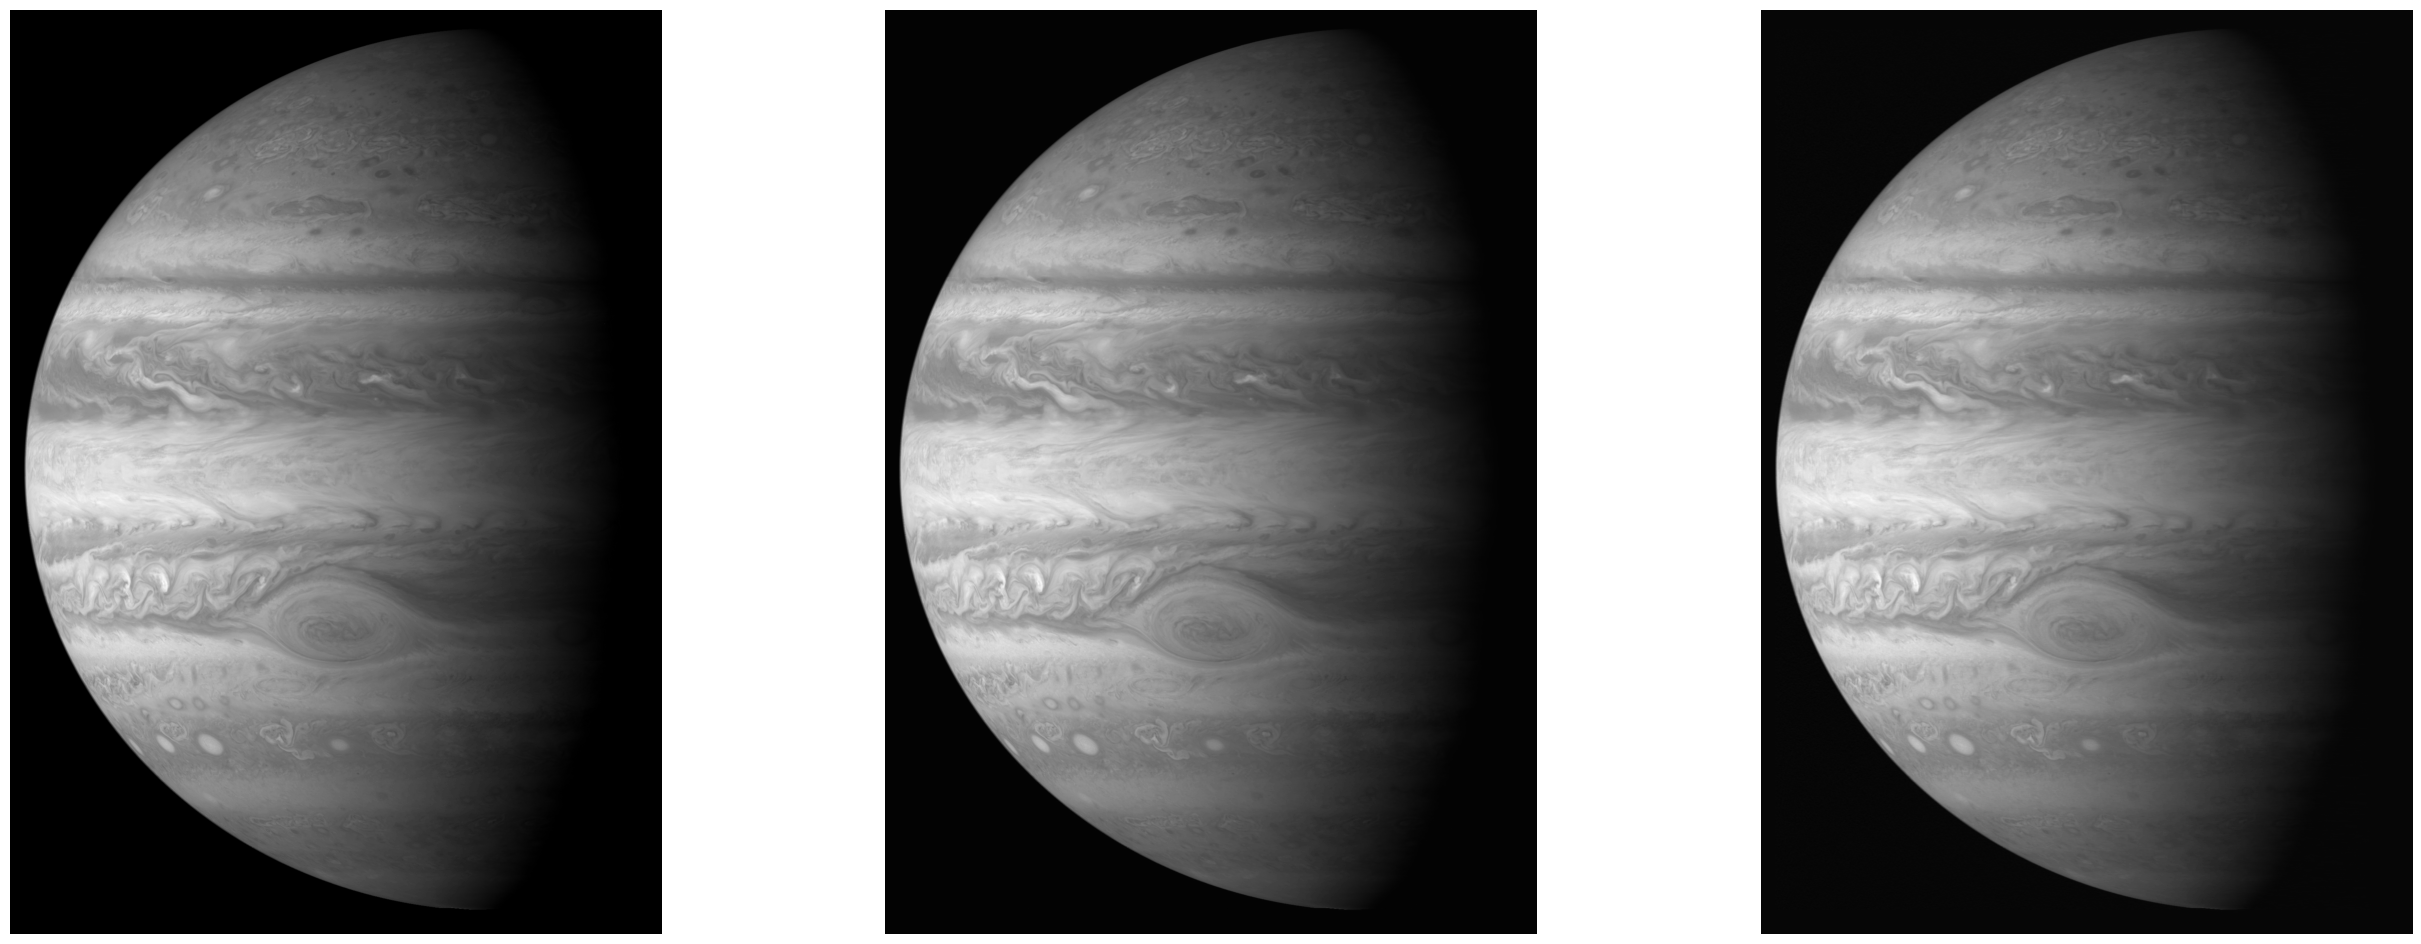

In [9]:
A = imread('jupiter.jpg')
X = np.mean(A, axis=2)

U, S, Vt = np.linalg.svd(X, full_matrices=0)

r = 400
q = 1
p = 5

rU, rS, rVt = randomSVD(X, r, q, p)

X_SVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ Vt[:(r+1),:]
er_SVD = np.linalg.norm(X-X_SVD, ord=2) / np.linalg.norm(X, ord=2)

r_SVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVt[:(r+1),:]
er_rSVD = np.linalg.norm(X-r_SVD, ord=2) / np.linalg.norm(X, ord=2)

fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(X_SVD)
axs[1].axis('off')
axs[2].imshow(r_SVD)
axs[2].axis('off')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


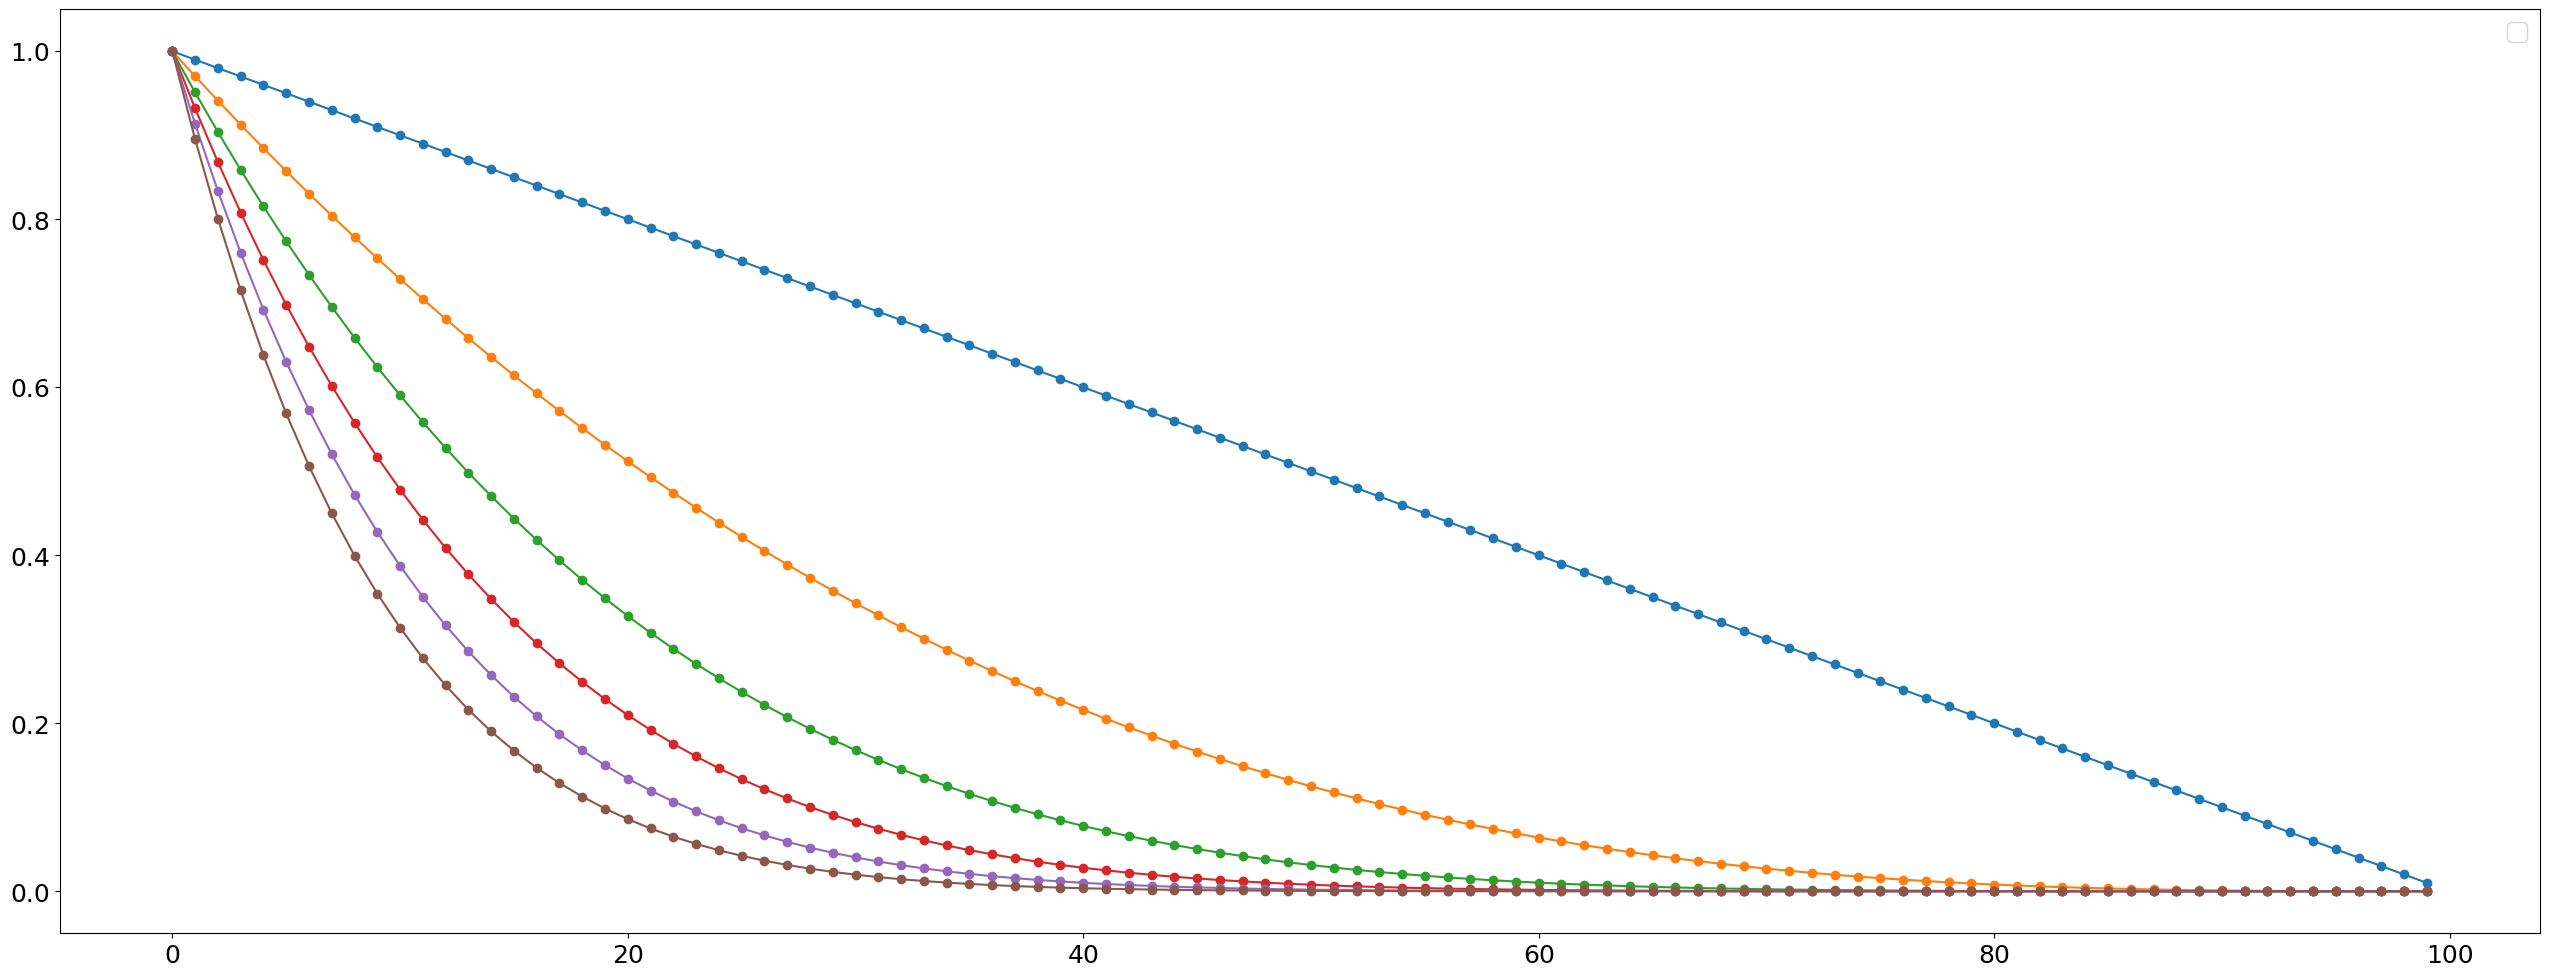

In [10]:
#How-to power iterations
X = np.random.randn(1000,100)
U, S, Vt = np.linalg.svd(X, full_matrices=0)
S = np.arange(1,0, -0.01)
X = U @ np.diag(S) @ Vt

plt.plot(S, 'o-')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    qU, qS, qVt = np.linalg.svd(Y, full_matrices=0)
    plt.plot(qS, '-o')

plt.show()
